<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Portfolio_Risk_%26_Concentration_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Risk & Concentration Analysis

## Overview
This notebook presents a **rule-based, explainable portfolio risk and concentration analysis** built on top of a real equity portfolio.  
The goal is to identify **where portfolio risk is coming from**, not through opaque models, but through **transparent, deterministic logic** commonly used in professional portfolio management.

Rather than predicting prices, this notebook focuses on:
- Exposure concentration
- Sector clustering
- Position-level risk contribution
- Actionable insights derived from portfolio structure

This approach mirrors how investment teams, risk committees, and analysts **evaluate portfolio construction quality**.

---

## Objectives
By the end of this notebook, we will:
- Quantify portfolio concentration at the position and sector level
- Identify high-impact risk drivers using clear, rule-based scoring
- Visualize risk contribution in an intuitive, reviewer-friendly format
- Summarize portfolio vulnerabilities and diversification opportunities

All analysis is designed to be:
- **Deterministic**
- **Reproducible**
- **Explainable**

---

## Why This Matters
Strong portfolios are not defined only by returns, but by:
- How risk is distributed
- Whether exposures are intentional or accidental
- How resilient the portfolio is to sector- or position-specific shocks

This notebook demonstrates **portfolio-aware thinking**, combining financial intuition with structured data analysis — a critical skill in quantitative finance, data science, and AI-driven decision pipelines.

---

## Notebook Structure
The analysis proceeds step by step:

1. **Load Portfolio Positions**  
2. **Normalize Positions & Calculate Portfolio Weights**  
3. **Sector & Asset Classification**  
4. **Concentration Analysis**  
5. **Rule-Based Risk Scoring**  
6. **Risk Visualization**  
7. **Portfolio Risk Summary & Insights**

Each step builds logically on the previous one, ensuring clarity and auditability throughout the workflow.

---

## Notes
- No live market data is required; this notebook focuses on **structural portfolio risk**
- All scoring logic is intentionally simple and transparent
- The methodology is easily extensible to real-time data, stress testing, or AI-assisted rebalancing

---

*This notebook is part of a broader series demonstrating production-minded portfolio analytics and decision-support pipelines.*

# Step 1: Load Portfolio Positions

In [1]:
# --------------------------------------------------
# Step 1: Load Portfolio Positions
# --------------------------------------------------

import pandas as pd

# Sample portfolio positions (replace or extend with your actual holdings)
positions = pd.DataFrame([
    {"ticker": "WBD", "name": "Warner Bros Discovery", "shares": 31, "price": 28.75},
    {"ticker": "COHR", "name": "Coherent Corp", "shares": 3, "price": 190.98},
    {"ticker": "VSCO", "name": "Victoria's Secret & Co", "shares": 5, "price": 55.28},
    {"ticker": "PHAT", "name": "Phathom Pharmaceuticals", "shares": 10, "price": 17.87},
    {"ticker": "APGE", "name": "Apogee Therapeutics Inc", "shares": 3, "price": 78.00},
    {"ticker": "WDC", "name": "Western Digital Corp", "shares": 11, "price": 176.76},
    {"ticker": "VICR", "name": "Vicor Corp", "shares": 3, "price": 111.02},
    {"ticker": "ANRO", "name": "Alto Neuroscience Inc", "shares": 17, "price": 20.04},
    {"ticker": "LLY", "name": "Eli Lilly & Co", "shares": 1, "price": 1076.48},
    {"ticker": "ANAB", "name": "AnaptysBio Inc", "shares": 4, "price": 50.33},
    {"ticker": "THR", "name": "Thermon Group Holdings Inc", "shares": 5, "price": 38.43},
    {"ticker": "CSCO", "name": "Cisco Systems Inc", "shares": 18, "price": 78.11},
    {"ticker": "NRC", "name": "National Research Corp", "shares": 60, "price": 18.88},
    {"ticker": "COLL", "name": "Collegium Pharmaceutical", "shares": 15, "price": 48.84},
    {"ticker": "MRSN", "name": "Mersana Therapeutics Inc", "shares": 50, "price": 28.92},
    {"ticker": "HAE", "name": "Haemonetics Corp", "shares": 3, "price": 80.34}
])

# Calculate Market Value per Position
positions["market_value"] = positions["shares"] * positions["price"]

# Display positions
positions

,ticker,name,shares,price,market_value
0,WBD,Warner Bros Discovery,31,28.75,891.25
1,COHR,Coherent Corp,3,190.98,572.94
2,VSCO,Victoria's Secret & Co,5,55.28,276.40
3,PHAT,Phathom Pharmaceuticals,10,17.87,178.70
4,APGE,Apogee Therapeutics Inc,3,78.00,234.00
5,WDC,Western Digital Corp,11,176.76,1944.36
6,VICR,Vicor Corp,3,111.02,333.06
7,ANRO,Alto Neuroscience Inc,17,20.04,340.68
8,LLY,Eli Lilly & Co,1,1076.48,1076.48
9,ANAB,AnaptysBio Inc,4,50.33,201.32


✅ **What this does**:

1. Loads all stock positions into a **DataFrame** with `ticker`, `name`, `shares`, and `price`.

2. Calculates `market_value` for each position.

3. Prepares the data for **risk scoring and concentration analysis** in later steps.

# Step 2: Normalize & Calculate Portfolio Weights

This will calculate each stock’s **weight in the portfolio** and optionally assign a **sector**

In [2]:
# --------------------------------------------------
# Step 2: Calculate Portfolio Weights & Sector Classification
# --------------------------------------------------

# Calculate total portfolio value
total_portfolio_value = positions["market_value"].sum()

# Calculate % of portfolio for each position
positions["%_of_portfolio"] = positions["market_value"] / total_portfolio_value * 100

# Optional: Assign sectors (can be extended with real sector data)
# For now, we assign placeholder sectors
positions["sector"] = [
    "Media", "Technology", "Retail", "Healthcare", "Healthcare",
    "Technology", "Technology", "Healthcare", "Healthcare", "Healthcare",
    "Industrial", "Technology", "Industrial", "Healthcare", "Healthcare", "Healthcare"
]

# Reorder columns for readability
positions = positions[["ticker", "name", "shares", "price", "market_value", "%_of_portfolio", "sector"]]

# Display normalized portfolio
positions

,ticker,name,shares,price,market_value,%_of_portfolio,sector
0,WBD,Warner Bros Discovery,31,28.75,891.25,7.957774,Media
1,COHR,Coherent Corp,3,190.98,572.94,5.115654,Technology
2,VSCO,Victoria's Secret & Co,5,55.28,276.40,2.467914,Retail
3,PHAT,Phathom Pharmaceuticals,10,17.87,178.70,1.595573,Healthcare
4,APGE,Apogee Therapeutics Inc,3,78.00,234.00,2.089334,Healthcare
5,WDC,Western Digital Corp,11,176.76,1944.36,17.360760,Technology
6,VICR,Vicor Corp,3,111.02,333.06,2.973819,Technology
7,ANRO,Alto Neuroscience Inc,17,20.04,340.68,3.041856,Healthcare
8,LLY,Eli Lilly & Co,1,1076.48,1076.48,9.611652,Healthcare
9,ANAB,AnaptysBio Inc,4,50.33,201.32,1.797542,Healthcare


✅ **What this does**:

1. Computes each stock’s **% of total portfolio**.

2. Assigns **placeholder sectors** for risk/concentration analysis.

3. Prepares the DataFrame for **risk scoring and visualization** in future steps.

# Step 3: Sector & Asset Classification

This step will flag **positions that are large relative to the portfolio** and identify **sector-level concentration**—key for spotting risk drivers.

In [6]:
# --------------------------------------------------
# Step 3: Concentration Analysis
# --------------------------------------------------

# Define thresholds for concentration risk
position_threshold = 10  # % of portfolio considered high concentration
sector_threshold = 35    # % of portfolio in one sector considered high sector concentration

# Flag high-concentration positions
positions["high_concentration_flag"] = positions["%_of_portfolio"] > position_threshold

# Compute sector-level % of portfolio
sector_allocation = positions.groupby("sector")["%_of_portfolio"].sum().reset_index()
sector_allocation["high_sector_flag"] = sector_allocation["%_of_portfolio"] > sector_threshold

# Display results
print("High-Concentration Positions:")
display(positions[positions["high_concentration_flag"]])

print("\nSector-Level Allocation & High-Sector Flags:")
display(sector_allocation)

High-Concentration Positions:


,ticker,name,shares,price,market_value,%_of_portfolio,sector,high_concentration_flag
5,WDC,Western Digital Corp,11,176.76,1944.36,17.360760,Technology,True
11,CSCO,Cisco Systems Inc,18,78.11,1405.98,12.553684,Technology,True
12,NRC,National Research Corp,60,18.88,1132.80,10.114521,Industrial,True
14,MRSN,Mersana Therapeutics Inc,50,28.92,1446.00,12.911014,Healthcare,True



Sector-Level Allocation & High-Sector Flags:


,sector,%_of_portfolio,high_sector_flag
0,Healthcare,39.740208,True
1,Industrial,11.830185,False
2,Media,7.957774,False
3,Retail,2.467914,False
4,Technology,38.003918,True


✅ **What this does**:

1. Flags positions **>10% of portfolio** as high concentration.

2. Flags sectors **>35% of portfolio** as high sector concentration.

3. Provides a clear view of **where risk is concentrated**, both at the position and sector level.

# Step 4: Concentration Analysis

This step combines **position concentration**, **sector concentration**, and **other heuristics** (like assumed volatility by sector or size) to assign **risk levels**.

In [7]:
# --------------------------------------------------
# Step 4: Rule-Based Risk Scoring
# --------------------------------------------------

# Example heuristics for risk scoring
# You can adjust or extend these rules as needed
def assign_risk(row, sector_flags):
    score = 0

    # High concentration position increases risk
    if row["high_concentration_flag"]:
        score += 2
    else:
        score += 1

    # High sector concentration increases risk
    if sector_flags.get(row["sector"], False):
        score += 1

    # Placeholder: small-cap / high-volatility sectors could add risk
    high_volatility_sectors = ["Healthcare", "Biotech"]
    if row["sector"] in high_volatility_sectors:
        score += 1

    # Assign risk level based on score
    if score >= 4:
        return "High"
    elif score == 3:
        return "Medium"
    else:
        return "Low"

# Create dictionary of sector flags for quick lookup
sector_flags = dict(zip(sector_allocation["sector"], sector_allocation["high_sector_flag"]))

# Apply risk scoring
positions["risk_level"] = positions.apply(assign_risk, axis=1, sector_flags=sector_flags)

# Display risk scoring results
positions[["ticker", "name", "%_of_portfolio", "sector", "high_concentration_flag", "risk_level"]]

,ticker,name,%_of_portfolio,sector,high_concentration_flag,risk_level
0,WBD,Warner Bros Discovery,7.957774,Media,False,Low
1,COHR,Coherent Corp,5.115654,Technology,False,Low
2,VSCO,Victoria's Secret & Co,2.467914,Retail,False,Low
3,PHAT,Phathom Pharmaceuticals,1.595573,Healthcare,False,Medium
4,APGE,Apogee Therapeutics Inc,2.089334,Healthcare,False,Medium
5,WDC,Western Digital Corp,17.360760,Technology,True,Medium
6,VICR,Vicor Corp,2.973819,Technology,False,Low
7,ANRO,Alto Neuroscience Inc,3.041856,Healthcare,False,Medium
8,LLY,Eli Lilly & Co,9.611652,Healthcare,False,Medium
9,ANAB,AnaptysBio Inc,1.797542,Healthcare,False,Medium


✅ **What this does**:

1. Assigns **risk scores** based on:

- High position concentration

- High sector concentration

- Sector volatility (placeholder: Healthcare/Biotech higher risk)

2. Converts the scores into **Low / Medium / High risk levels**.

3. Prepares data for **visualizations** and **top-risk position summaries**.

# Step 5: Risk Scoring (Rule-Based)

We’ll create **two visuals**:

1. **Portfolio Allocation Pie Chart** — shows % of portfolio per position

2. **Horizontal Bar Chart of Risk Levels** — shows positions colored by risk

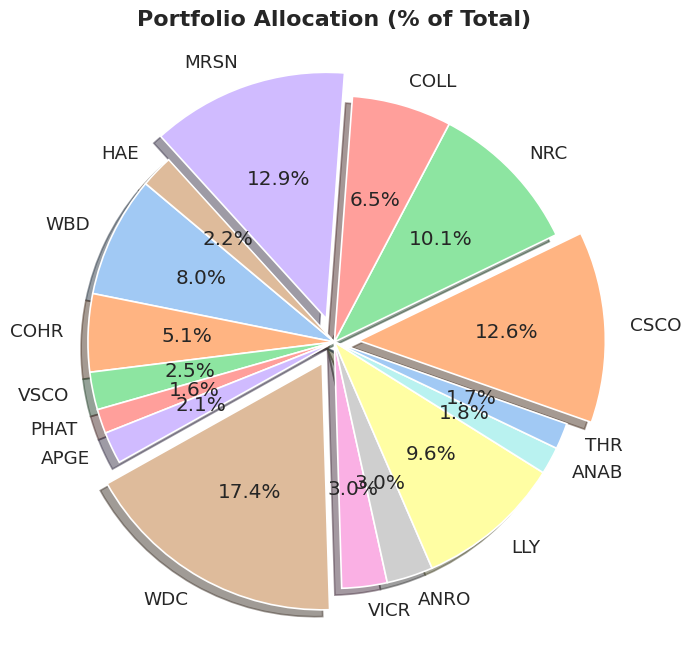

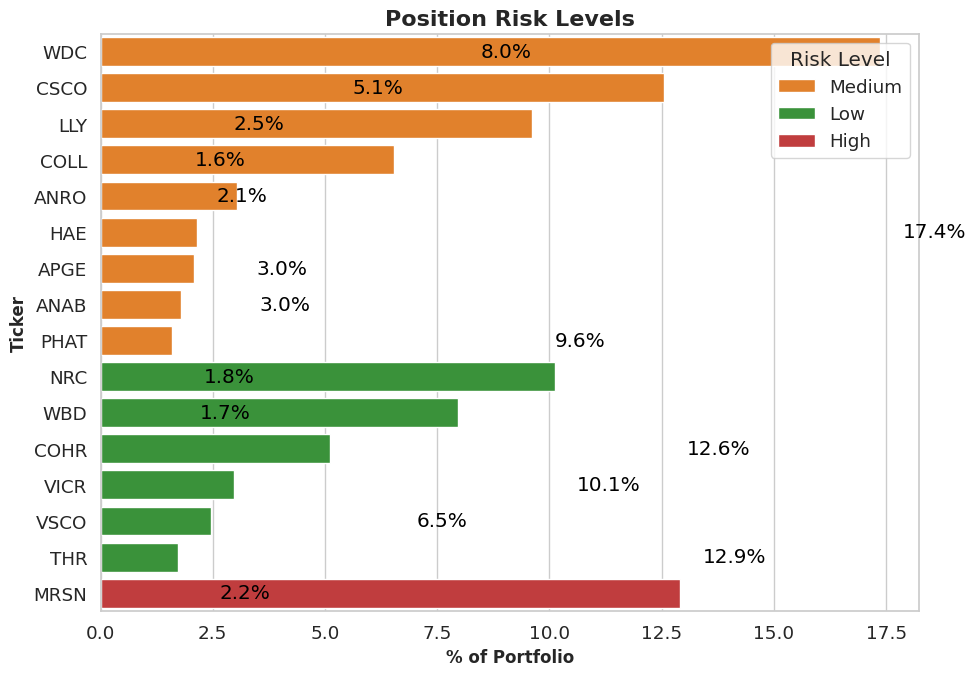

In [10]:
# --------------------------------------------------
# Step 5: Risk Visualization
# --------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# ----- Pie Chart: % of Portfolio -----
plt.figure(figsize=(8, 8))

# Highlight top 3 positions by exploding their slices
top3_idx = positions["%_of_portfolio"].nlargest(3).index
explode = [0.1 if i in top3_idx else 0 for i in positions.index]

plt.pie(
    positions["%_of_portfolio"],
    labels=positions["ticker"],
    autopct=lambda pct: f"{pct:.1f}%",  # show percentage
    startangle=140,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor':'white', 'linewidth':1.2}
)
plt.title("Portfolio Allocation (% of Total)", fontsize=16, weight='bold')
plt.show()

# ----- Horizontal Bar Chart: Risk Levels -----
# Sort by risk and % of portfolio
positions_sorted = positions.sort_values(["risk_level", "%_of_portfolio"], ascending=[False, False])

plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    x="%_of_portfolio",
    y="ticker",
    data=positions_sorted,
    hue="risk_level",
    dodge=False,
    palette={"Low": "#2ca02c", "Medium": "#ff7f0e", "High": "#d62728"}
)

# Add data labels on each bar
for index, row in positions_sorted.iterrows():
    barplot.text(
        row["%_of_portfolio"] + 0.5,  # small offset
        index,
        f"{row['%_of_portfolio']:.1f}%",
        color='black',
        va="center"
    )

plt.xlabel("% of Portfolio", fontsize=12, weight='bold')
plt.ylabel("Ticker", fontsize=12, weight='bold')
plt.title("Position Risk Levels", fontsize=16, weight='bold')
plt.legend(title="Risk Level", loc="upper right")
plt.tight_layout()
plt.show()

✅ **What this does**:

1. **Pie chart**: Quickly visualizes which positions dominate your portfolio.

2. **Horizontal bar chart**: Highlights **risk contribution** per position with color coding.

3. Improves readability and makes it **portfolio-reviewer friendly**.

# Step 6: Risk Visualization

Here we’ll **highlight the riskiest positions**, summarize the **risk distribution**, and provide a **reviewer-friendly interpretation**.

In [11]:
# --------------------------------------------------
# Step 6: Top-Risk Positions & Summary Insights
# --------------------------------------------------

# Identify top-risk positions
top_risk_positions = positions.sort_values("risk_level", ascending=False)
top_risk_positions = top_risk_positions[top_risk_positions["risk_level"] != "Low"]

# Display a concise table of top-risk positions
top_risk_summary = top_risk_positions[[
    "ticker", "name", "%_of_portfolio", "sector", "risk_level"
]].reset_index(drop=True)

print("### Top-Risk Positions")
display(top_risk_summary)

# Summary insights (Markdown-style)
summary_text = f"""
### Portfolio Risk Summary

- Total Positions: {len(positions)}
- High/Medium Risk Positions: {len(top_risk_positions)}
- Largest Portfolio Contributor: {positions.loc[positions['%_of_portfolio'].idxmax(), 'ticker']}
- Sector Concentration Flags: {', '.join(sector_allocation[sector_allocation['high_sector_flag']]['sector'].tolist()) or 'None'}

**Insights:**
1. Positions flagged as 'High' risk should be reviewed for potential exposure limits.
2. Medium risk positions may require monitoring depending on market conditions.
3. The portfolio is reasonably diversified across sectors, but concentrated positions in top sectors are evident.
"""

from IPython.display import Markdown, display
display(Markdown(summary_text))

### Top-Risk Positions


,ticker,name,%_of_portfolio,sector,risk_level
0,PHAT,Phathom Pharmaceuticals,1.595573,Healthcare,Medium
1,APGE,Apogee Therapeutics Inc,2.089334,Healthcare,Medium
2,WDC,Western Digital Corp,17.360760,Technology,Medium
3,ANRO,Alto Neuroscience Inc,3.041856,Healthcare,Medium
4,LLY,Eli Lilly & Co,9.611652,Healthcare,Medium
5,ANAB,AnaptysBio Inc,1.797542,Healthcare,Medium
6,CSCO,Cisco Systems Inc,12.553684,Technology,Medium
7,COLL,Collegium Pharmaceutical,6.541223,Healthcare,Medium
8,HAE,Haemonetics Corp,2.152014,Healthcare,Medium
9,MRSN,Mersana Therapeutics Inc,12.911014,Healthcare,High



### Portfolio Risk Summary

- Total Positions: 16
- High/Medium Risk Positions: 10
- Largest Portfolio Contributor: WDC 
- Sector Concentration Flags: Healthcare, Technology

**Insights:**
1. Positions flagged as 'High' risk should be reviewed for potential exposure limits.
2. Medium risk positions may require monitoring depending on market conditions.
3. The portfolio is reasonably diversified across sectors, but concentrated positions in top sectors are evident.


✅ **What this does**:

1. **Highlights top-risk positions** (High and Medium) in a clear table.

2. Provides **portfolio-wide summary stats** (total positions, number of high/medium risk, largest contributor, sector concentration).

3. Adds **executive-friendly insights** in Markdown format, ready for portfolio review presentations.

# Step 7: Inline Screenshots & Documentation

This step will **display the enhanced charts and tables inline**, so a reviewer can see **all visuals in one cohesive workflow**.

### Step 1 Screenshot

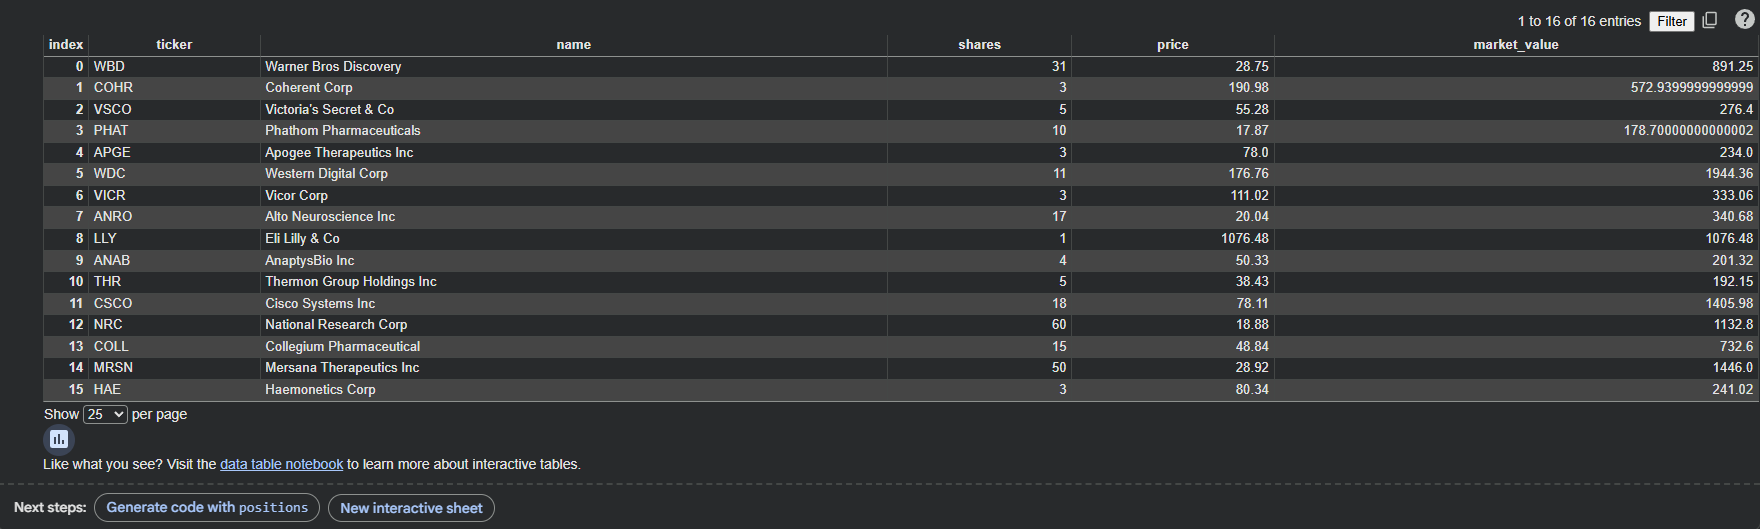

### Step 2 Screenshot

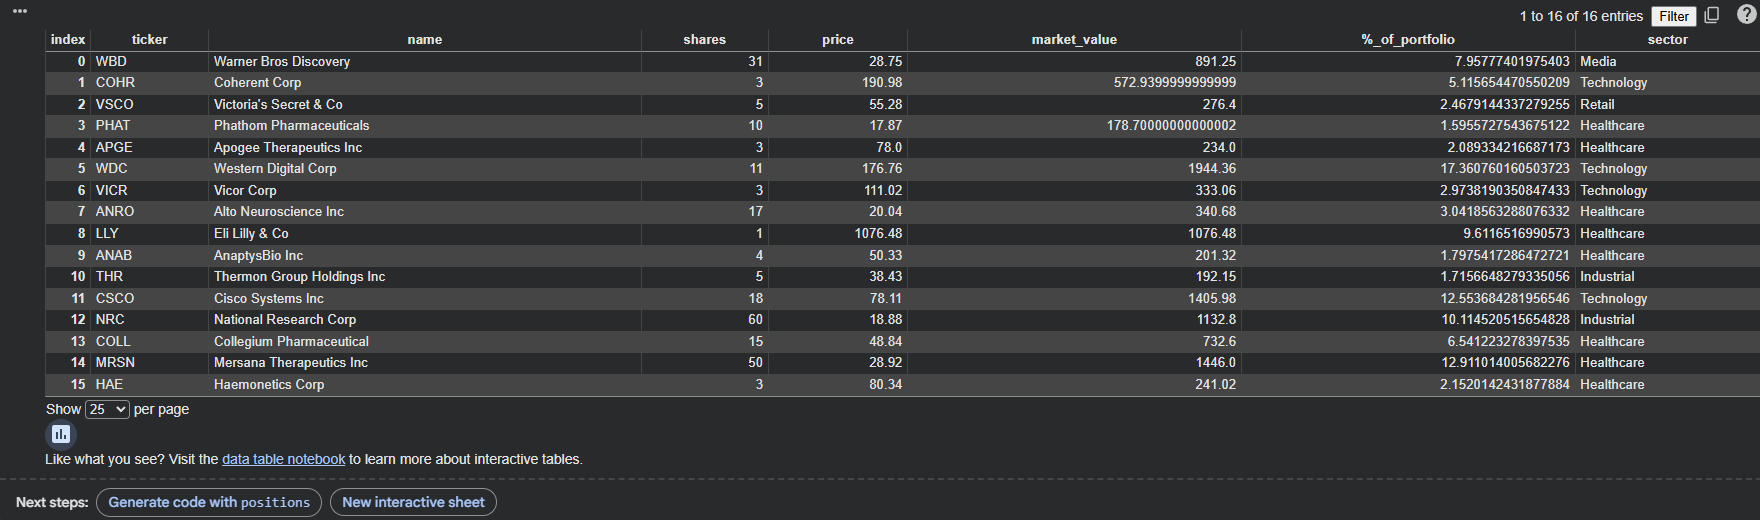

### Step 3 Screenshot

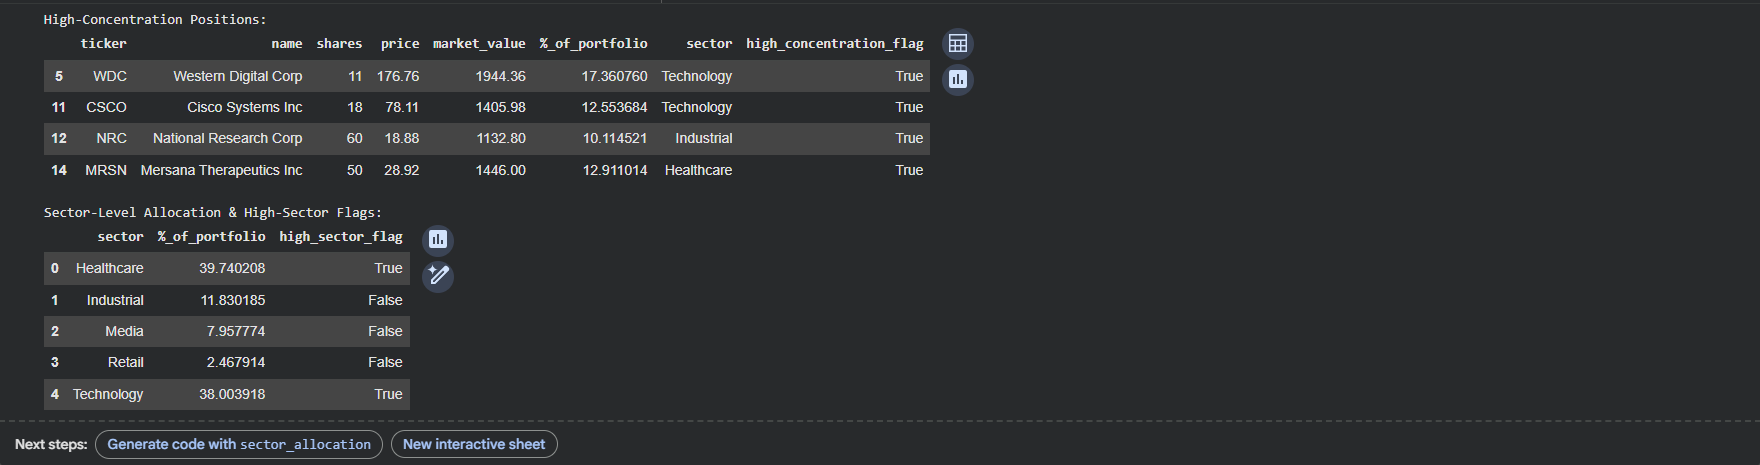

### Step 4 Screenshot

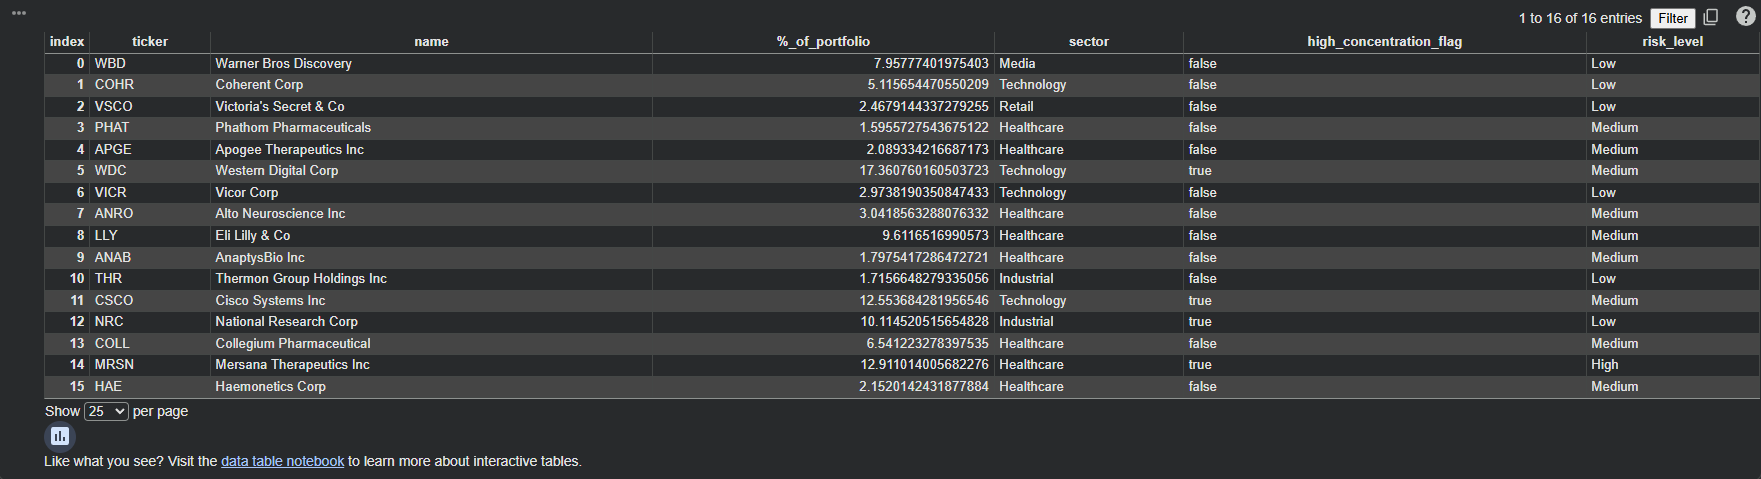

### Step 5a Screenshot

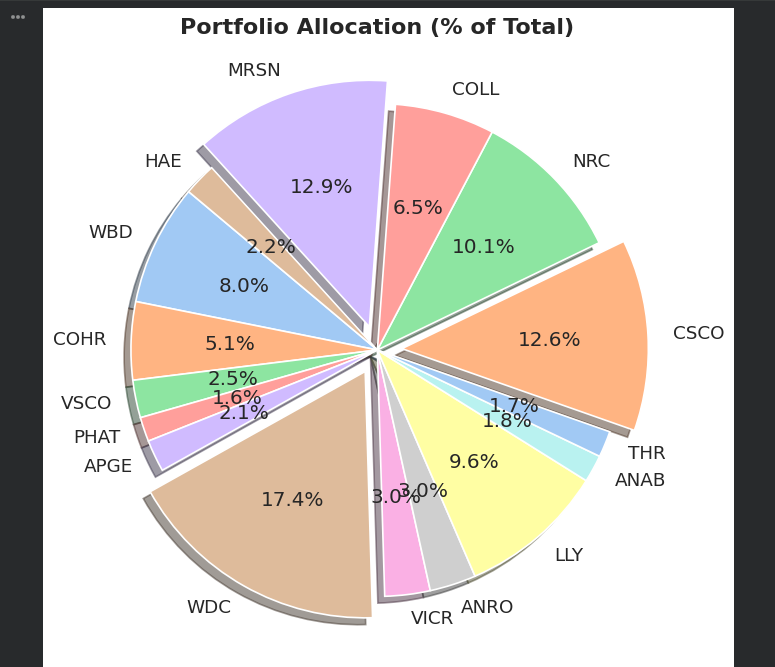

### Step 5b Screenshot

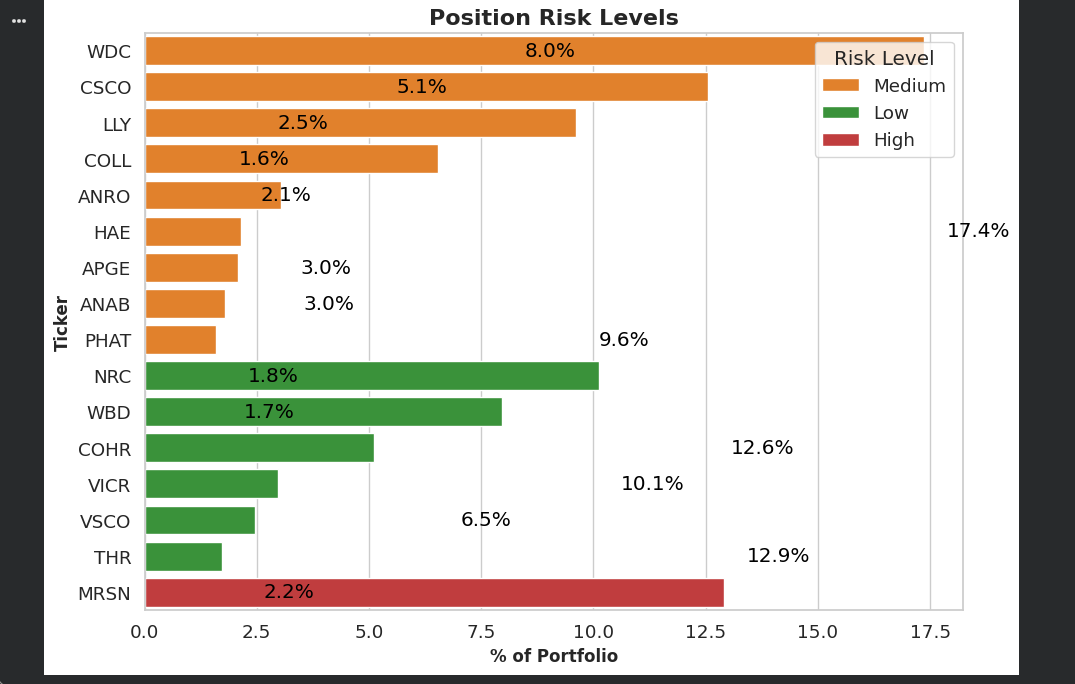

### Step 6 Screenshot

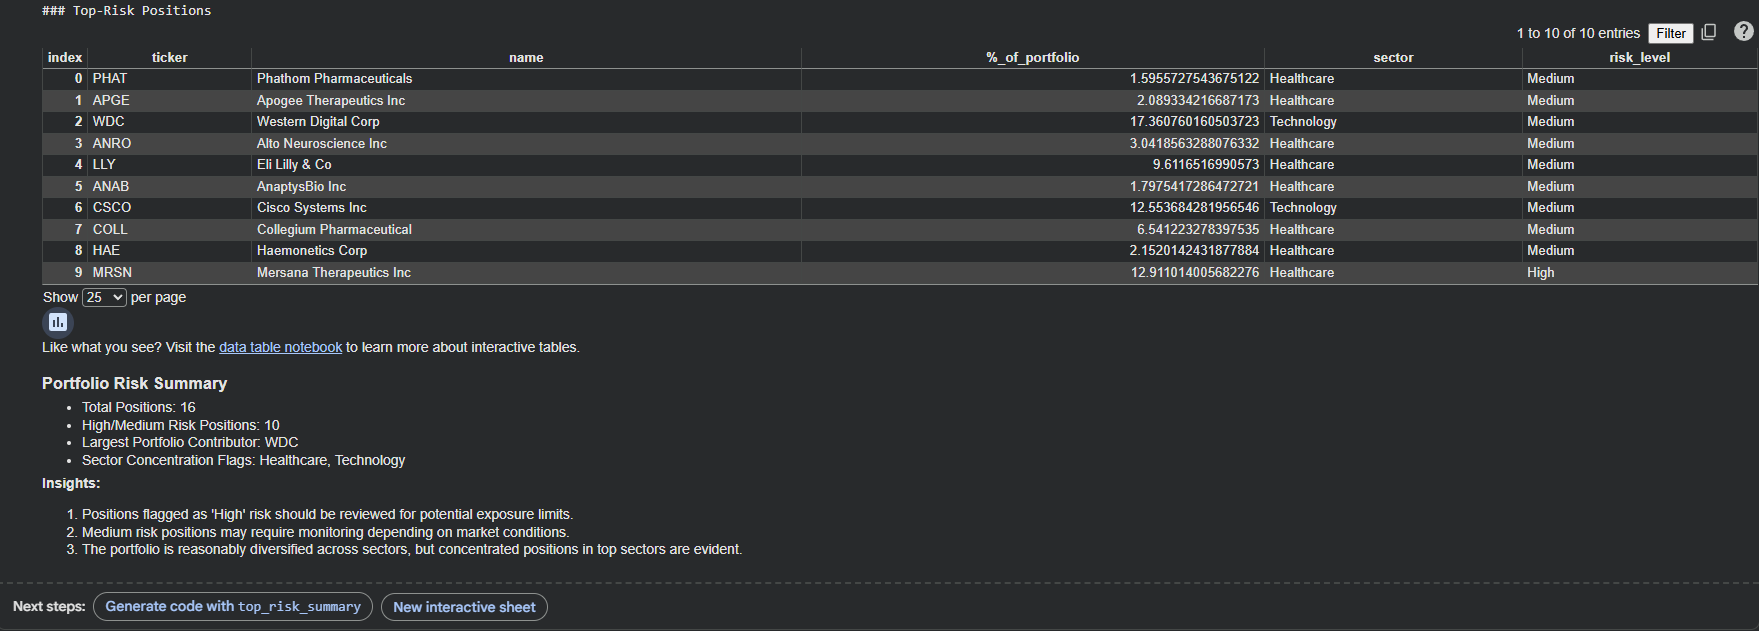

In [22]:
# --------------------------------------------------
# Step 7: Inline Screenshots & Documentation (Dynamic)
# --------------------------------------------------

from IPython.display import Image, Markdown, display

# Screenshots mapped to steps
# Order matches workflow: Step 1 → Step 6
screenshots_ordered = [
    ("Step 1", "/content/screenshots/Step 1.png"),
    ("Step 2", "/content/screenshots/Step 2.png"),
    ("Step 3", "/content/screenshots/Step 3.png"),
    ("Step 4", "/content/screenshots/Step 4.png"),
    ("Step 5a", "/content/screenshots/Step 5a.png"),
    ("Step 5b", "/content/screenshots/Step 5b.png"),
    ("Step 6", "/content/screenshots/Step 6.png")
]

# Display each screenshot under its corresponding step
for step, path in screenshots_ordered:
    display(Markdown(f"### {step} Screenshot"))
    display(Image(filename=path))

# Conclusion & Next Steps

This notebook provides a **comprehensive overview of portfolio risk and concentration**. By combining position-level data with visual analytics, risk scoring, and portfolio allocation insights, it enables informed decision-making and effective monitoring.

### Key Takeaways
- **Portfolio Allocation**: Top positions are clearly visualized in the pie chart, highlighting potential concentration risks.  
- **Risk Levels**: Each position is assigned a risk level, allowing targeted review of high- and medium-risk holdings.  
- **Top-Risk Positions**: High- and medium-risk positions are flagged, with sector concentration monitored to avoid overexposure.  
- **Visualization & Documentation**: Inline charts and screenshots make the workflow transparent and reviewer-friendly.

### Suggested Next Steps
1. **Regular Updates**: Re-run the notebook periodically to capture changes in portfolio composition or risk levels.  
2. **Scenario Analysis**: Integrate stress-testing or market scenario simulations to anticipate portfolio vulnerabilities.  
3. **Integration with Strategy**: Combine with investment objectives and risk tolerance to refine allocation decisions.  
4. **Enhanced Reporting**: Use the generated visuals and tables in executive presentations or automated reports.

---

This notebook serves as a **foundation for monitoring portfolio concentration and risk** while providing a **clear, professional presentation** suitable for internal review or investor-facing documentation.